In [896]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [650]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [652]:
def linear(z):
    return z

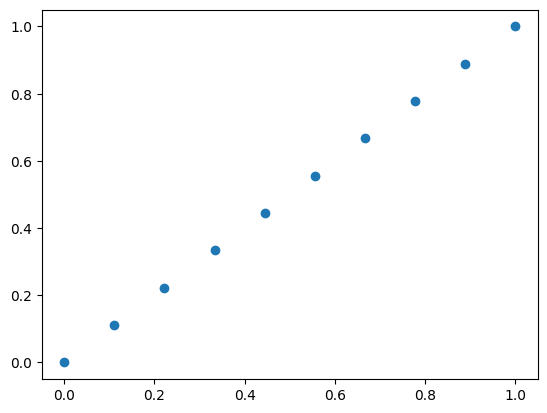

In [772]:
data_x = np.linspace(0,1,10)
def function(x):
    return 5 * x**4 - 1.5 * x**3 + 1.5 * x**2 - 1.2 * x
data_y = linear(data_x)
plt.scatter(data_x, data_y)

In [880]:
def f_forward(x,w1,w2,b1,b2): #feed forward neural network
    z1 = np.dot(x,w1) + b1
    a1 = linear(z1)
    z2 = np.dot(a1,w2) + b2
    a2 = linear(z2)
    return a2

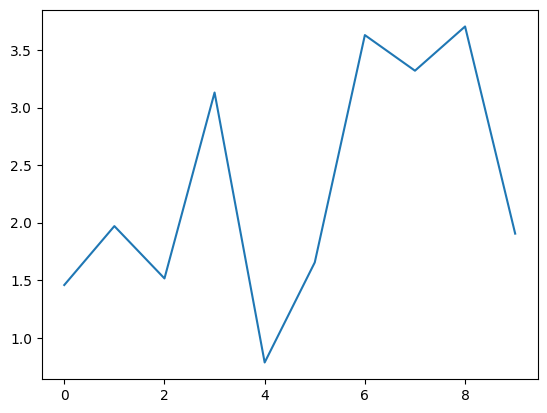

In [882]:
initial_w1 = np.random.rand(len(data_x))
initial_w2 = np.random.rand(len(data_x))
initial_b1 = np.random.rand(1)[0]
initial_b2 = np.random.rand(1)[0]
plt.plot(f_forward(data_x,initial_w1, initial_w2, initial_b1, initial_b2))

In [884]:
def residual(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [886]:
def update_w_b(x, y, w1, w2, b1, b2, alpha):
    # Forward pass
    z1 = np.dot(x, w1) + b1
    a1 = z1  # linear activation
    z2 = np.dot(a1, w2) + b2
    y_pred = z2  # linear activation

    # Compute gradient
    dL_dy = 2 * np.sum(y_pred - y)

    w2_adj = a1 * dL_dy
    b2_adj = np.sum(dL_dy)

    w1_adj = dL_dy * np.multiply(x, w2)
    b1_adj = np.sum(w2) * dL_dy

    # Update weights
    w2 -= alpha * w2_adj
    b2 -= alpha * b2_adj
    w1 -= alpha * w1_adj
    b1 -= alpha * b1_adj

    return w1, w2, b1, b2


In [888]:
def train(x,y,w1,w2,b1,b2,alpha,epoch):
    costs = []
    for i in range(epoch):
        y_pred = f_forward(x,w1,w2,b1,b2)
        cost = residual(y, y_pred)
        costs.append(cost)
        #print('epoch = ', i+1, 'cost =', cost)
        w1, w2, b1, b2 = update_w_b(x, y, w1, w2, b1, b2, alpha)
    plt.plot(range(epoch), costs)
    plt.xlabel('epochs')
    plt.ylabel('cost')
    return w1, w2, b1, b2

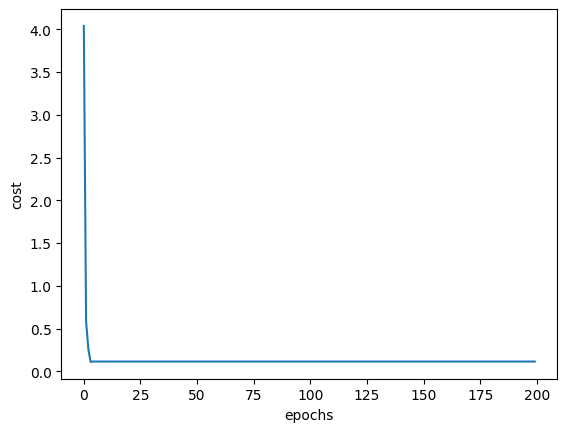

In [890]:
optimal_w1, optimal_w2, optimal_b1, optimal_b2 = train(data_x, data_y, initial_w1, initial_w2, initial_b1, initial_b2, 0.01, 200)

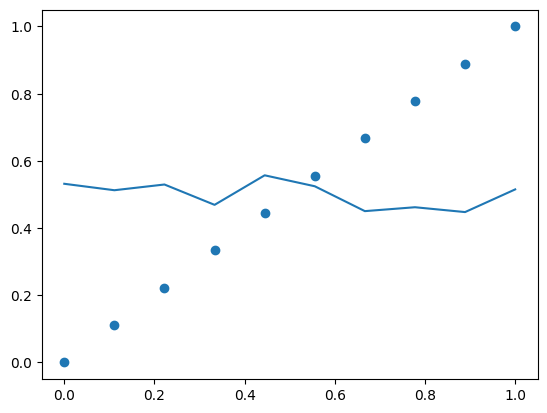

In [892]:
model = f_forward(data_x, optimal_w1, optimal_w2, optimal_b1 , optimal_b2)
plt.scatter(data_x, data_y)
plt.plot(data_x, model)

In [894]:
#need more neurons to train a more approximate model

In [912]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(20, activation='linear'),  #20 neurons with linear activation layer
    layers.Dense(1)
])

In [914]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(data_x.reshape(-1,1), data_y.reshape(-1,1), epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4526
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.4343
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.4165
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.3990
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.3820
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.3655
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.3494
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.3338
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.3186
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.3039
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.2897
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.2759
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.2626
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2498
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2374
Epoch 1

In [926]:
predictions = model.predict(data_x.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


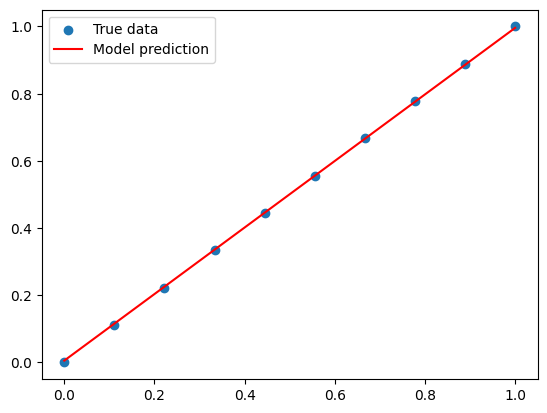

In [938]:
plt.scatter(data_x, data_y, label='True data')
plt.plot(data_x, predictions, color='red', label='Model prediction')
plt.legend()
plt.show()